In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Step 1: Importing and Exploring Data

In [2]:
purchase = pd.read_csv("data/purchase_data.csv")

In [3]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
purchase.shape

(58693, 24)

In [5]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
ID                   58693 non-null int64
Day                  58693 non-null int64
Incidence            58693 non-null int64
Brand                58693 non-null int64
Quantity             58693 non-null int64
Last_Inc_Brand       58693 non-null int64
Last_Inc_Quantity    58693 non-null int64
Price_1              58693 non-null float64
Price_2              58693 non-null float64
Price_3              58693 non-null float64
Price_4              58693 non-null float64
Price_5              58693 non-null float64
Promotion_1          58693 non-null int64
Promotion_2          58693 non-null int64
Promotion_3          58693 non-null int64
Promotion_4          58693 non-null int64
Promotion_5          58693 non-null int64
Sex                  58693 non-null int64
Marital status       58693 non-null int64
Age                  58693 non-null int64
Education            58693 non-null int64

In [6]:
# missing data
purchase.isna().sum().sum()

0

Note: there is no missing data and all variables are quantitative.

In [7]:
# number of unique customers
purchase.ID.nunique()

500

## Step 2: Data Segmentation

### Importing Segmentation Model

In [8]:
scaler = pickle.load(open("notebooks/scaler.pickle", "rb"))

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
pca = pickle.load(open("notebooks/pca.pickle", "rb"))

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator PCA from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
kmeans_pca = pickle.load(open("notebooks/kmeans_pca.pickle", "rb"))

/Users/kbosko/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KMeans from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Standardization

In [11]:
features = purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

In [12]:
purchase_scaled = scaler.transform(features)

### PCA

In [13]:
purchase_scaled_pca = pca.transform(purchase_scaled)

### KMeans segmentation

In [14]:
purchase_sc_pca_kmeans = kmeans_pca.predict(purchase_scaled_pca)

In [15]:
purchase_sc_pca_kmeans

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [16]:
purchase_predictors = purchase.copy()

In [17]:
purchase_predictors['Segment'] = purchase_sc_pca_kmeans

In [18]:
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


## Step 3: Desriptive Analysis by Segments

- How often each segment group go shopping? 
- How much money they spend?
- What products they purchase?

### Data Analysis by Customer

In [101]:
# aggregating data at customer level
purchase_desc = purchase_predictors.groupby('ID').agg({'Incidence': ['count', 'sum'], 'Segment': 'mean'}).reset_index()

In [102]:
#renaming columns
purchase_desc.columns = ['ID', 'N_Visits', 'N_Purchases', 'Segment']

In [103]:
# engineer new column - average number of purchases
purchase_desc['Avg_N_Purchases_per_Visit'] = purchase_desc['N_Purchases']/purchase_desc['N_Visits']

In [104]:
purchase_desc.head()

,ID,N_Visits,N_Purchases,Segment,Avg_N_Purchases_per_Visit
0,200000001,101,9,2,0.089109
1,200000002,87,11,3,0.126437
2,200000003,97,10,2,0.103093
3,200000004,85,11,2,0.129412
4,200000005,111,13,1,0.117117


### Segment Proportions

In [105]:
# calculate segment proportions
segment_prop = purchase_desc[['ID', 'Segment']].groupby(['Segment']).count()/purchase_desc['ID'].nunique()

In [106]:
segment_prop

,ID
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


In [107]:
# this is just a code to show that the sequence of methods - groupby and count 
# produce different output in the number of columns
segment_prop_tmp = purchase_desc.groupby(['Segment'])[['ID', 'Segment']].count()/purchase_desc['ID'].nunique()
segment_prop_tmp

,ID,Segment
Segment,,
0,0.206,0.206
1,0.220,0.220
2,0.378,0.378
3,0.196,0.196


Note: DIFFERENT OUTPUT!! If selecting columns precedes grouping, we get one column. If grouping precedes selecting columns - we get as many columns as when selected.

In [108]:
segment_prop = segment_prop.rename(columns = {'ID': 'Segment Proportions'})
segment_prop

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


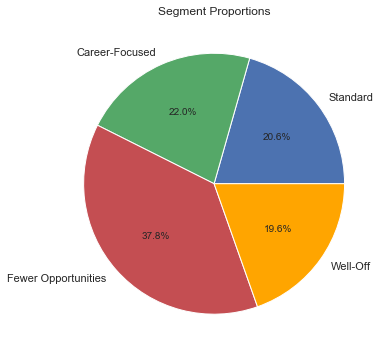

In [109]:
plt.figure(figsize=(9,6))
plt.title("Segment Proportions")
plt.pie(segment_prop['Segment Proportions'], 
        labels=['Standard', 'Career-Focused', 'Fewer Opportunities', 'Well-Off'],
       autopct='%1.1f%%',
       colors=('b','g','r','orange'));

### Purchase Occasion (Number of Visits) and Purchase Incidence (Number of Purhcases)

- How often do people from different segments visit the store?
- How often does the customer from a particular segment buy a product?
- How often do they buy relative to the number of their store visits?

To answer these questions, we will calculate mean and standard deviations by segments. Mean shows the average behavior of each segment, while standard deviations tells us how homogenous the segment is.

In [110]:
segments_mean = purchase_desc.groupby('Segment').mean()
segments_mean.drop('ID', axis=1, inplace=True)
segments_mean

,N_Visits,N_Purchases,Avg_N_Purchases_per_Visit
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [111]:
segments_std = purchase_desc.groupby('Segment').std()
segments_std.drop('ID', axis=1, inplace=True)
segments_std

,N_Visits,N_Purchases,Avg_N_Purchases_per_Visit
Segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


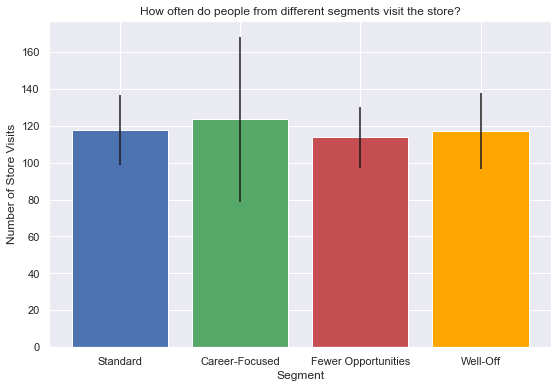

In [112]:
plt.figure(figsize=(9,6))
plt.title("How often do people from different segments visit the store?")

plt.bar(x=segments_mean.index, height=segments_mean['N_Visits'],
        yerr=segments_std['N_Visits'],
       tick_label=['Standard', 'Career-Focused', 'Fewer Opportunities', 'Well-Off'],
       color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits');

**Conclusion**: career-focused segment group visits the store on average most often. However, it is the least homogenous group of all segments, with high variation in the number of visits per customer. The other three segments - Standard, Fewer Opportunities, Well-Off - are very similar in terms how often they visit the store.

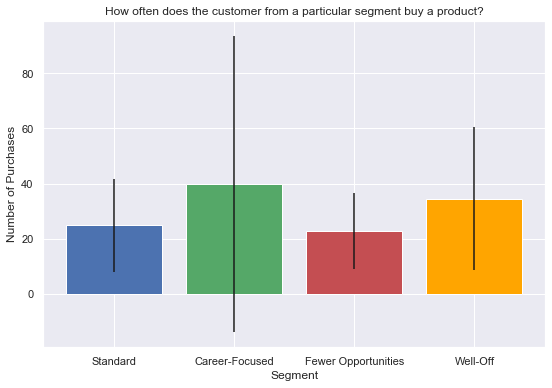

In [113]:
plt.figure(figsize=(9,6))
plt.title("How often does the customer from a particular segment buy a product?")

plt.bar(x=segments_mean.index, height=segments_mean['N_Purchases'],
        yerr=segments_std['N_Purchases'],
       tick_label=['Standard', 'Career-Focused', 'Fewer Opportunities', 'Well-Off'],
       color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases');

Conclusion: the same purchase pattern for Career-Focused segment - it has the highest number of purchases, but is the least homogenous group. As expected, Fewer-Opportunities group buys the least among segments and Well-Off segment - the most.

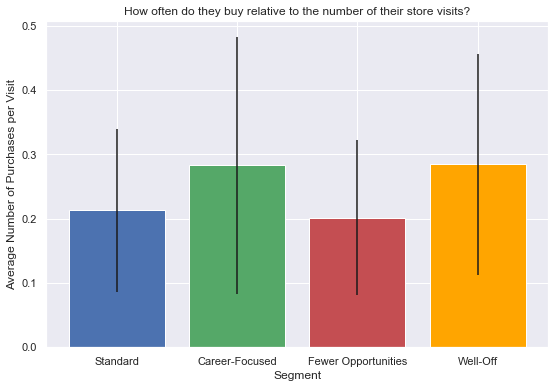

In [114]:
plt.figure(figsize=(9,6))
plt.title("How often do they buy relative to the number of their store visits?")

plt.bar(x=segments_mean.index, height=segments_mean['Avg_N_Purchases_per_Visit'],
        yerr=segments_std['Avg_N_Purchases_per_Visit'],
       tick_label=['Standard', 'Career-Focused', 'Fewer Opportunities', 'Well-Off'],
       color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Average Number of Purchases per Visit');

## Step 4: Brand Choice

- Which brand the customer is going to choose?

We focus on observations when customers bought the product (here chocolate candy bar) at least once. This information is stored in 'Incidence' feature.

In [120]:
purchase_incidence = purchase_predictors[purchase_predictors['Incidence'] == 1]
purchase_incidence.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2


In [123]:
brand_dummies = pd.get_dummies(purchase_incidence['Brand'], prefix='Brand', prefix_sep=' ');
brand_dummies.head()

,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5
6,0,1,0,0,0
11,0,0,0,0,1
19,1,0,0,0,0
24,0,0,0,1,0
29,0,1,0,0,0


In [125]:
brand_dummies['Segment'], brand_dummies['ID'] = purchase_incidence['Segment'], purchase_incidence['ID']
brand_dummies.head()

,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [129]:
# average brand choice by segment - aggregate by customer and then by segment
mean_brand_choice = brand_dummies.groupby('ID').mean().groupby('Segment').mean()
mean_brand_choice

,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5
Segment,,,,,
0,0.251186,0.396502,0.156481,0.059474,0.136357
1,0.072871,0.146808,0.039976,0.112395,0.627951
2,0.137567,0.681190,0.020923,0.061548,0.098772
3,0.041928,0.117422,0.030610,0.613623,0.196417


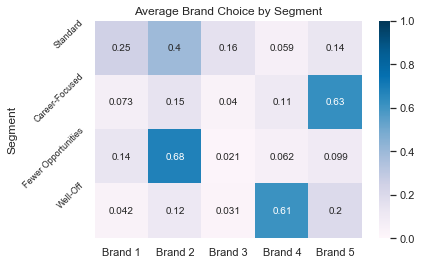

In [140]:
# because we are visualizing proportions, our data variates between 0 and 1
plt.title('Average Brand Choice by Segment')
sns.heatmap(mean_brand_choice, vmin=0, vmax=1, annot=True, cmap='PuBu')
plt.yticks(mean_brand_choice.index, ['Standard', 'Career-Focused', 'Fewer Opportunities', 'Well-Off'], 
           rotation=45, fontsize=9);

**Conclusion**: <br>
Brands are organized by price - Brand 1 is the cheapest one, while Brand 5 - is the most expensive. <br><br>
Almost 70% of Fewer-Opportunity segment prefers Brand 2, <br>
63% of Career-Focused segment has preference for the most expensive Brand 5, <br>
61% of Well-Off segment prefer to buy Brand 4, the second most expensive brand, <br>
40% of Standard segment shows preference for Brand 4. 

No segment has the preference for the cheapest Brand 1, so the price is not what matters most for our customers.

**Actionable Insights:** <br>
There is an indication that Career-Focused segment is willing to buy 'luxury' product. Hence, there is an opportunity to raise the price of Brand 5.

Since Standard segment doesn't have much preference for any of the brands, we might try to influence them try out different Brands.

## Step 5: Revenue by Segments

In [159]:
# add columns from purchase_purchase_incidence dataframe
revenue_tmp = brand_dummies.merge(purchase_incidence[['ID', 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Quantity']], how='inner', on='ID')
revenue_tmp.head()

,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5,Segment,ID,Price_1,Price_2,Price_3,Price_4,Price_5,Quantity
0,0,1,0,0,0,2,200000001,1.50,1.90,1.99,2.09,2.67,2
1,0,1,0,0,0,2,200000001,1.39,1.90,1.91,2.12,2.62,1
2,0,1,0,0,0,2,200000001,1.47,1.90,1.99,1.97,2.67,2
3,0,1,0,0,0,2,200000001,1.21,1.35,1.99,2.16,2.68,1
4,0,1,0,0,0,2,200000001,1.46,1.88,1.97,1.89,2.37,3


In [175]:
brands_matrix = brand_dummies.drop(['ID', 'Segment'], axis=1)
brands_matrix.head()

,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5
6,0,1,0,0,0
11,0,0,0,0,1
19,1,0,0,0,0
24,0,0,0,1,0
29,0,1,0,0,0


In [185]:
quantity_by_brands = brands_matrix.apply(lambda x: x*purchase_incidence['Quantity'])
quantity_by_brands.head()

,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5
6,0,2,0,0,0
11,0,0,0,0,1
19,2,0,0,0,0
24,0,0,0,1,0
29,0,3,0,0,0


In [189]:
prices_matrix = purchase_incidence[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
prices_matrix.T.head()

,6,11,19,24,29,52,79,80,97,101,...,58606,58608,58612,58615,58617,58621,58648,58674,58687,58691
Price_1,1.50,1.39,1.47,1.21,1.46,1.47,1.35,1.33,1.41,1.59,...,1.49,1.27,1.46,1.37,1.37,1.48,1.35,1.50,1.42,1.51
Price_2,1.90,1.90,1.90,1.35,1.88,1.89,1.89,1.51,1.85,1.87,...,1.90,1.52,1.89,1.26,1.26,1.89,1.57,1.85,1.51,1.82
Price_3,1.99,1.91,1.99,1.99,1.97,2.01,2.07,2.07,2.00,2.01,...,1.97,1.95,1.99,1.96,1.96,2.01,2.02,2.06,1.97,2.09
Price_4,2.09,2.12,1.97,2.16,1.89,1.90,2.26,2.26,2.24,2.09,...,2.16,1.97,2.15,2.16,2.16,2.18,2.21,2.24,2.24,2.24
Price_5,2.67,2.62,2.67,2.68,2.37,2.71,2.63,2.62,2.79,2.66,...,2.66,2.67,2.65,2.67,2.67,2.69,2.70,2.79,2.78,2.80


In [194]:
quantity_by_brands.shape, prices_matrix.T.shape

((14638, 5), (5, 14638))

In [214]:
revenue_tmp = np.dot(quantity_by_brands, prices_matrix.T)
revenue_tmp.shape

(14638, 14638)

In [218]:
# revenue for each purchase incidence 
revenue_per_purchase = np.diagonal(revenue_tmp)

In [272]:
segments_dummies = pd.get_dummies(purchase_incidence['Segment'], prefix='Segment', prefix_sep='_');
segments_dummies.head()

,Segment_0,Segment_1,Segment_2,Segment_3
6,0,0,1,0
11,0,0,1,0
19,0,0,1,0
24,0,0,1,0
29,0,0,1,0


In [247]:
revenue_per_segment_per_purchase = segments_dummies.apply(lambda x: x*revenue_per_purchase)
revenue_per_segment_per_purchase.head()

,Segment_0,Segment_1,Segment_2,Segment_3
6,0.0,0.0,3.80,0.0
11,0.0,0.0,2.62,0.0
19,0.0,0.0,2.94,0.0
24,0.0,0.0,2.16,0.0
29,0.0,0.0,5.64,0.0


In [283]:
revenue_per_segment_per_purchase.shape, brands_matrix.shape

((14638, 4), (14638, 5))

In [311]:
revenue_per_brand_per_segment = np.dot(revenue_per_segment_per_purchase.T, brands_matrix)
revenue_per_brand_per_segment.shape

(4, 5)

In [327]:
revenue_per_brand_per_segment = pd.DataFrame(revenue_per_brand_per_segment, columns=['Brand 1', 'Brand 2', 'Brand 3', 'Brand 4', 'Brand 5'])
revenue_per_brand_per_segment['Total_Segment'] = revenue_per_brand_per_segment.sum(axis=1)
revenue_per_brand_per_segment


,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5,Total_Segment
0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [328]:
revenue_per_brand_per_segment.reset_index(inplace=True)
revenue_per_brand_per_segment = revenue_per_brand_per_segment.rename(columns={'index': 'Segment'})
revenue_per_brand_per_segment['Segment'] = revenue_per_brand_per_segment['Segment'].map({0: 'Standard', 
                                                                     1: 'Career-Focused', 
                                                                     2: 'Fewer-Opportunities', 
                                                                     3:'Well-Off'})

revenue_per_brand_per_segment

,Segment,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5,Total_Segment
0,Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [332]:
total_revenue = revenue_per_brand_per_segment['Total_Segment'].sum(axis=0)
total_revenue

82756.58

In [333]:
revenue_per_brand_per_segment['Revenue_Prop'] = revenue_per_brand_per_segment['Total_Segment']/total_revenue
revenue_per_brand_per_segment['Segment_Prop'] = segment_prop['Segment Proportions']
revenue_per_brand_per_segment

,Segment,Brand 1,Brand 2,Brand 3,Brand 4,Brand 5,Total_Segment,Revenue_Prop,Segment_Prop
0,Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.176300,0.206
1,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.301513,0.220
2,Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.251220,0.378
3,Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.270967,0.196


In [353]:
revenue_long = pd.wide_to_long(revenue_per_brand_per_segment.iloc[:, :6], stubnames='Brand ', i='Segment', j='Brand')
revenue_long.columns = ['Revenue']
revenue_long.reset_index(inplace=True)

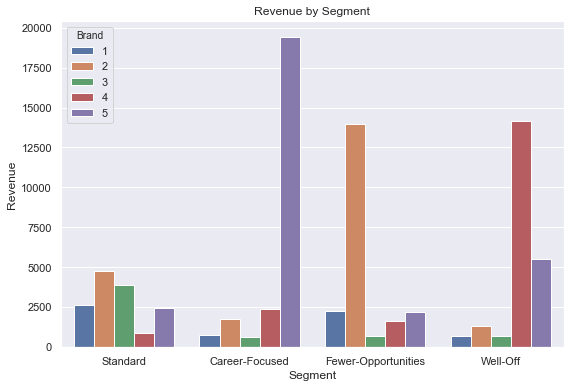

In [354]:
plt.figure(figsize=(9,6))
plt.title("Revenue by Segment")
sns.barplot(x='Segment', hue='Brand', y='Revenue', data=revenue_long);

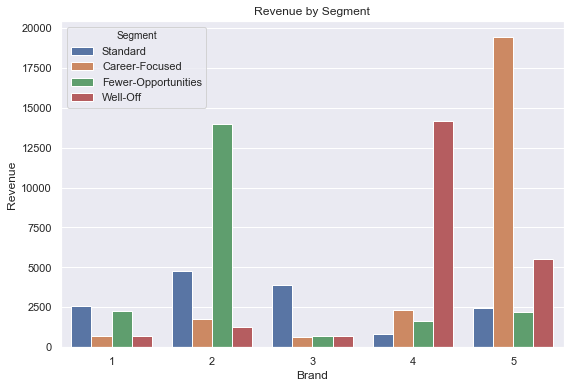

In [355]:
plt.figure(figsize=(9,6))
plt.title("Revenue by Segment")
sns.barplot(x='Brand', hue='Segment', y='Revenue', data=revenue_long);

**Conclusion**: <br>
Brand 1 is preferred by both Standard and Fewer-Opportunities segments <br>
Brand 2 - by far by Fewer-Opportunities segment<br>
Brand 3 - predominantly by Standard segment<br>
Brand 4 - by far by Well-Off<br>
Brand 5 - by far by Career-Focused <br>

**Actionable Insights**: <br>
if Brand 3 reduces the price, Standard segment might pivot towards it. <br>
Well-Off group seems to be loyal to more expensive brands (Brand 4 and in less extent Brand 5), so they are unaffected by price. Brand 4 might try causiously increasing its price. The hypothesis is that they retain most of its customers and increase the revenue per sale.<br>

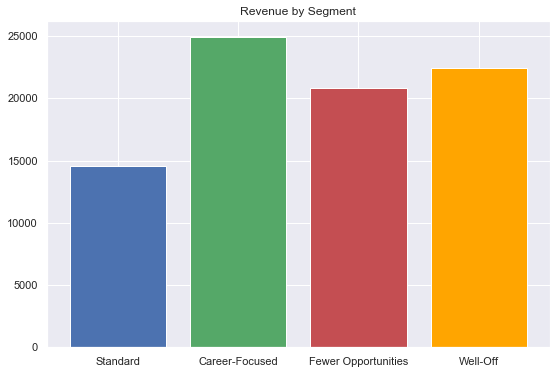

In [334]:
plt.figure(figsize=(9,6))
plt.title("Revenue by Segment")

plt.bar(x=range(4), height=revenue_per_brand_per_segment.Total_Segment,
       tick_label=['Standard', 'Career-Focused', 'Fewer Opportunities', 'Well-Off'],
       color=('b','g','r','orange'));

**Conclusion**: Career-Focused brings the most revenue among the segments (30%) even though it's not the biggest segment. As already established, it is the segment that buys the most expensive brand. It brings disproportionately more money, hence it is the most prominent segment for the store.

Standard segment brings the least revenue of all segments (17% of revenue), even though it's relatively big compared to all segments.

Fewer-Opportunities and Well-Off bring about that same size of revenue (25-27%), although Fewer-Opportunities is twice as big as Fewer-Opportunities.

### Revenue by Brands

In [227]:
# revenue by brand in the diagonal
revenue_tmp = np.dot(quantity_by_brands.T, prices_matrix)
revenue_by_brand = np.diagonal(revenue_tmp)
revenue_by_brand

array([ 6305.65, 21768.31,  6021.52, 19040.1 , 29621.  ])

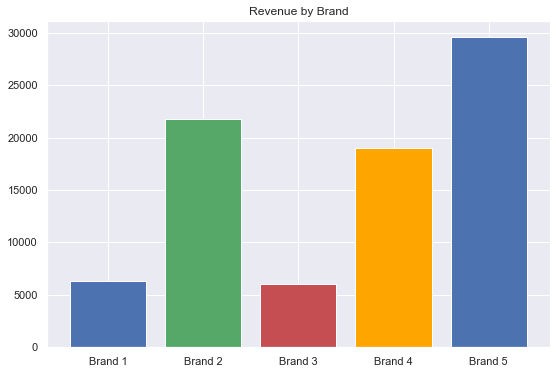

In [244]:
plt.figure(figsize=(9,6))
plt.title("Revenue by Brand")

plt.bar(x=range(5), height=revenue_by_brand.tolist(),
       tick_label=['Brand 1', 'Brand 2', 'Brand 3', 'Brand 4', 'Brand 5'],
       color=('b','g','r','orange'));

**Conclusion**: Brand 3 brings the least money in terms of revenue, even though it's the middle brand in terms of price. 

## Acknowledgement:

This project is part of "Customer Analytics" course by [365DataScience](https://365datascience.com)

However, I modified and streamlined some code (e.g. through using matrix multiplication when calculating Revenue or by using agg function when aggregating multiple columns).